
# K-Nearest Neighbors (KNN) Model Notebook

This notebook demonstrates building a K-Nearest Neighbors (KNN) model with step-by-step explanations. We'll cover:

1. Data Loading and Preprocessing
2. Data Visualization
3. Model Building and Training
4. Model Evaluation
5. Conclusion

Let's get started!


# Assignment No 16 - KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df = pd.read_csv("Zoo.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Zoo.csv'

In [ ]:
df[df.type == 7]["animal name"].unique()


array(['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'scorpion',
       'seawasp', 'slug', 'starfish', 'worm'], dtype=object)

In [ ]:
dict = {
    "Class_Number": [1,2,3,4,5,6,7],
    "Number_Of_Animal_Species_In_Class":[41,20,5,13,3,8,10],
    "Class_Type": ["Mammal","Bird","Reptile","Fish","Amphibian","Bug","Invertebrate"],
    "Animal_Names": [['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy',
       'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe',
       'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion',
       'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus',
       'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon',
       'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole',
       'wallaby', 'wolf'],['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk',
       'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant',
       'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren'],['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara'],
       ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring',
       'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna'],['frog', 'newt', 'toad'],['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth',
       'termite', 'wasp'],['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'scorpion',
       'seawasp', 'slug', 'starfish', 'worm']]
}
class_data = pd.DataFrame(dict)


In [ ]:
class_data


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"[aardvark, antelope, bear, boar, buffalo, calf..."
1,2,20,Bird,"[chicken, crow, dove, duck, flamingo, gull, ha..."
2,3,5,Reptile,"[pitviper, seasnake, slowworm, tortoise, tuatara]"
3,4,13,Fish,"[bass, carp, catfish, chub, dogfish, haddock, ..."
4,5,3,Amphibian,"[frog, newt, toad]"
5,6,8,Bug,"[flea, gnat, honeybee, housefly, ladybird, mot..."
6,7,10,Invertebrate,"[clam, crab, crayfish, lobster, octopus, scorp..."


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
class_data
class_data.sort_values(by='Number_Of_Animal_Species_In_Class', inplace=True ,ascending= False)


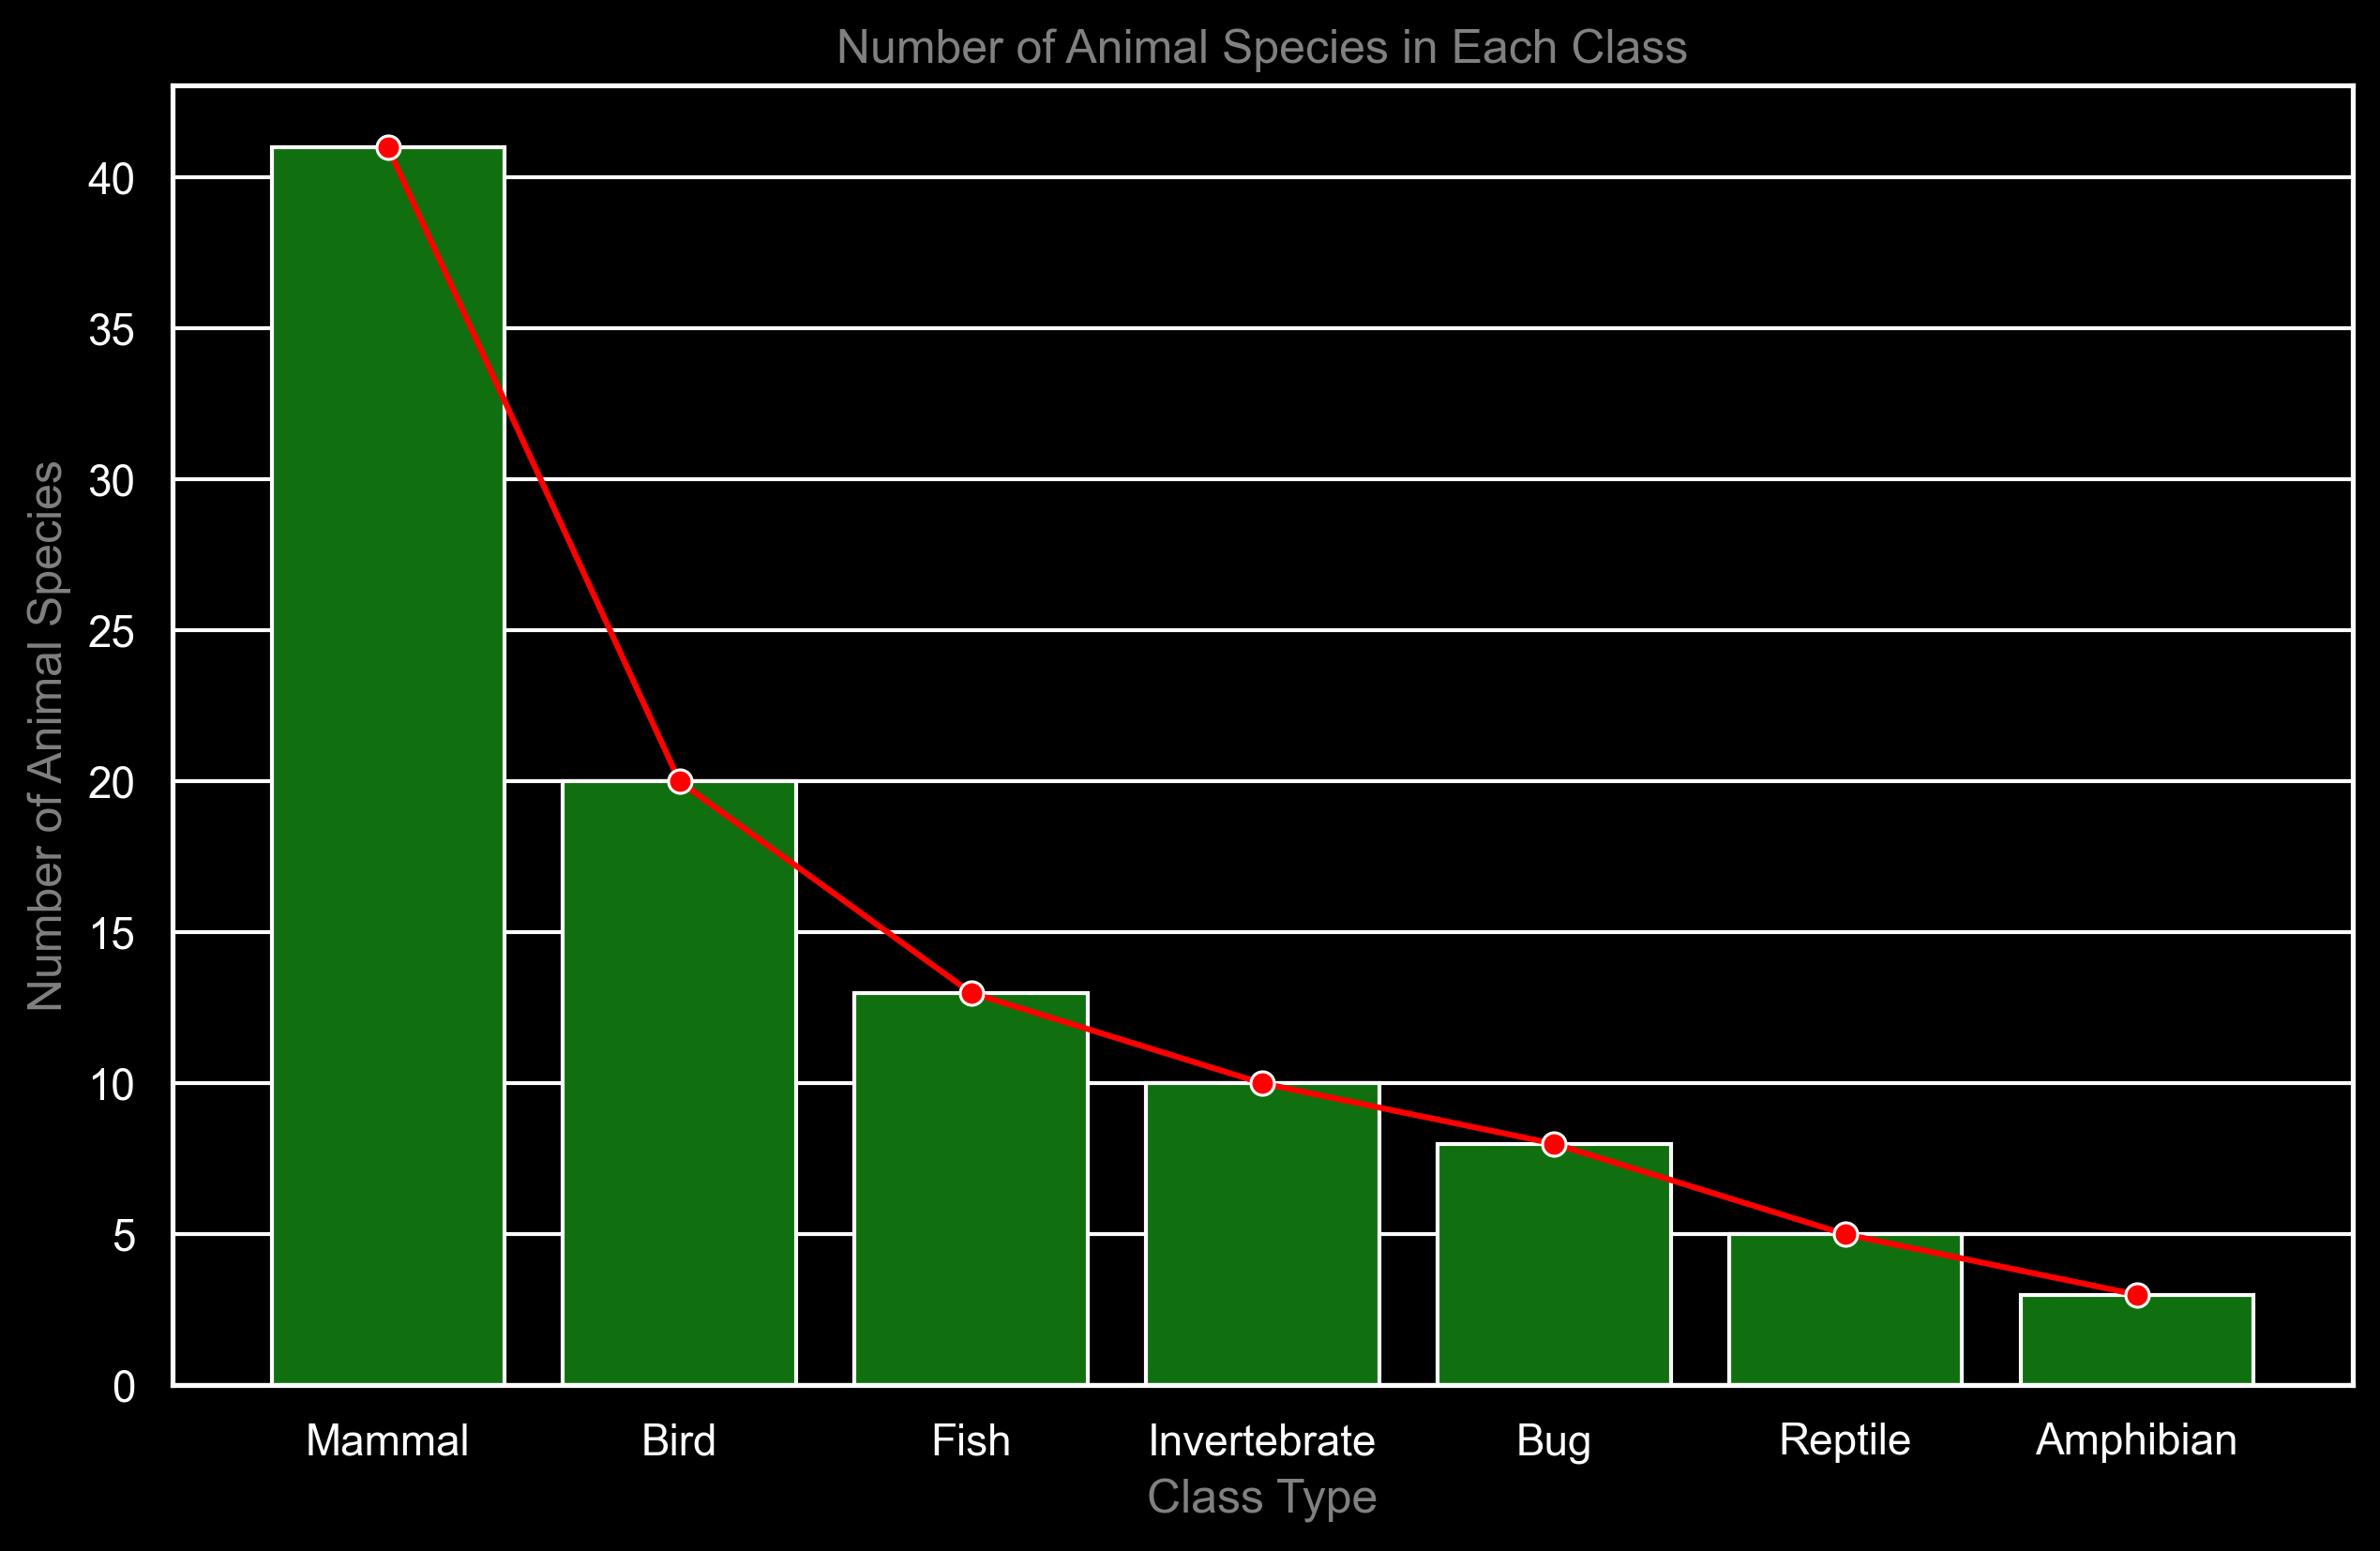

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.barplot(x="Class_Type", y="Number_Of_Animal_Species_In_Class", data=class_data, color='green')
plt.title('Number of Animal Species in Each Class', color='grey')
sns.lineplot(x="Class_Type", y="Number_Of_Animal_Species_In_Class", data=class_data, marker='o', linestyle='-', color='r')
plt.xlabel("Class Type", color='grey')
plt.ylabel("Number of Animal Species", color='grey')
plt.show()


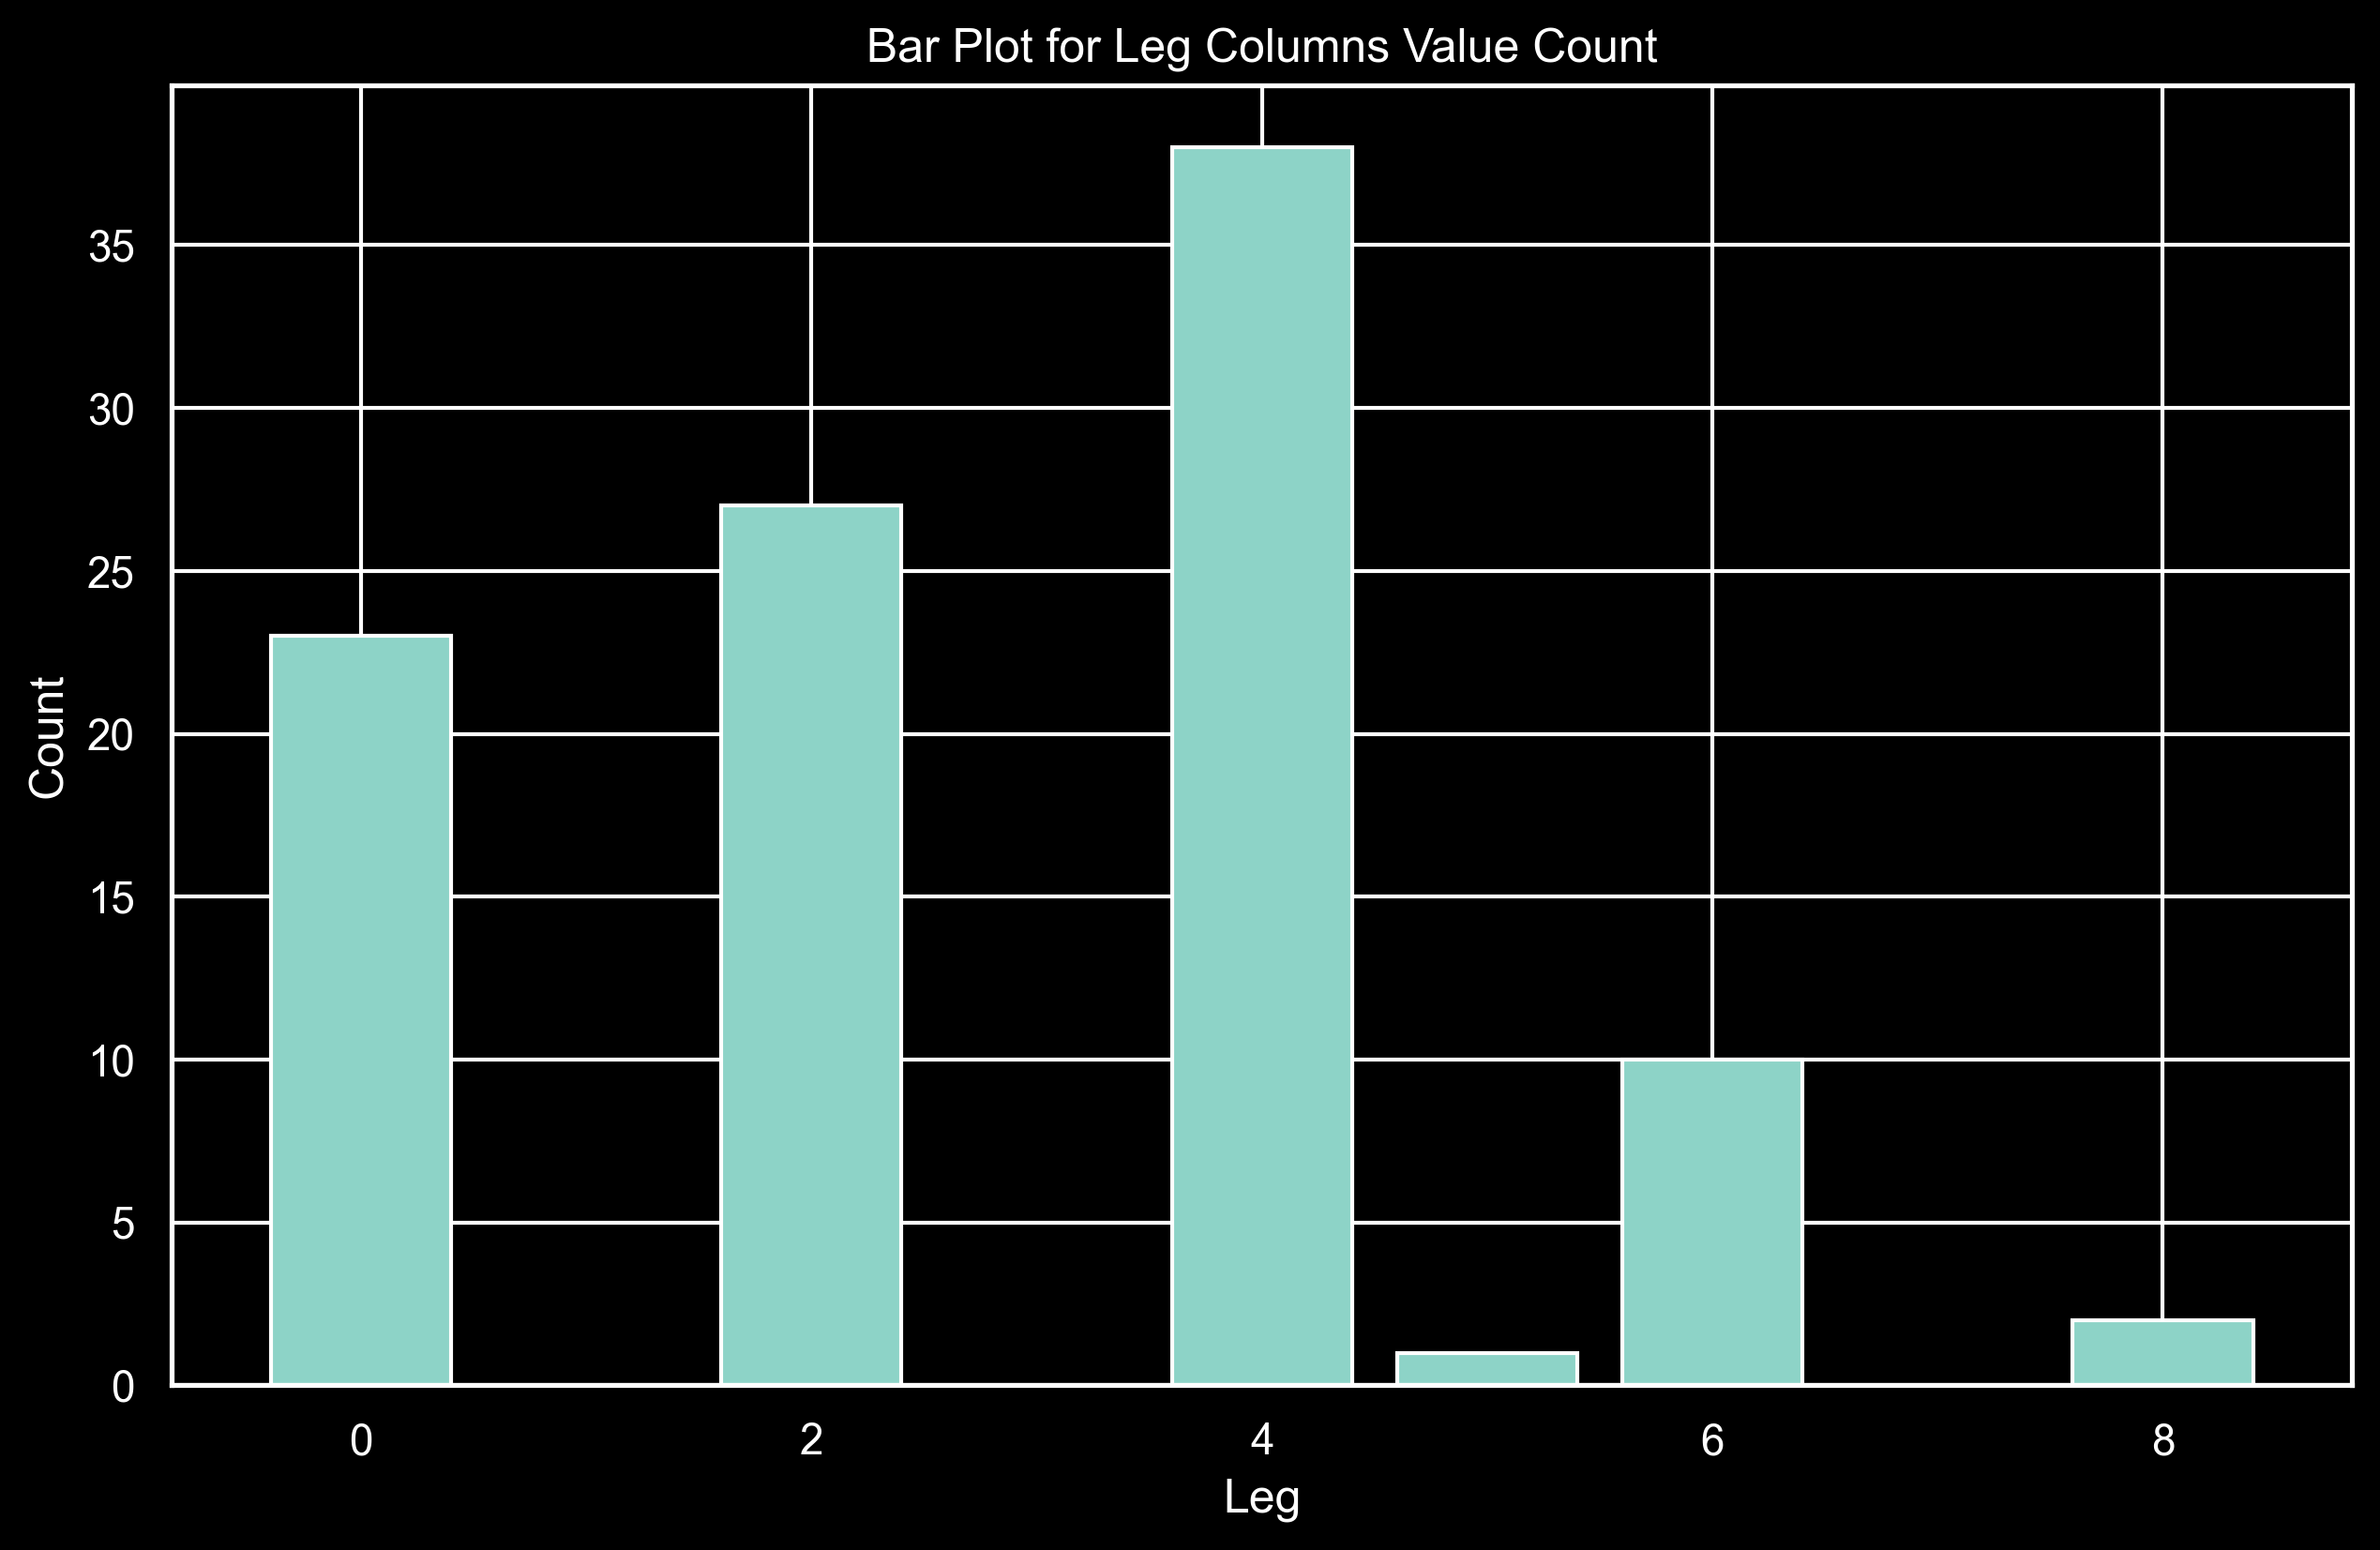

In [ ]:
df
plt.figure(figsize=(10,6))
plt.bar(df['legs'].value_counts().index, df['legs'].value_counts().values)
plt.xlabel('Leg')
plt.ylabel('Count')
plt.title('Bar Plot for Leg Columns Value Count')
plt.show()


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]


In [ ]:
X.drop(columns="animal name",inplace= True)


In [ ]:
X


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=12)


In [ ]:
X_train


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
23,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
knn.score(X_train,y_train), knn.score(X_test,y_test)


(0.8205128205128205, 0.8260869565217391)

In [ ]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))


In [ ]:
train_acc


[1.0,
 0.9871794871794872,
 0.9743589743589743,
 0.9615384615384616,
 0.9230769230769231,
 0.9102564102564102,
 0.8717948717948718,
 0.8333333333333334,
 0.8205128205128205,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7307692307692307]

In [ ]:
test_acc


[1.0,
 0.9615384615384616,
 0.9230769230769231,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.7692307692307693]

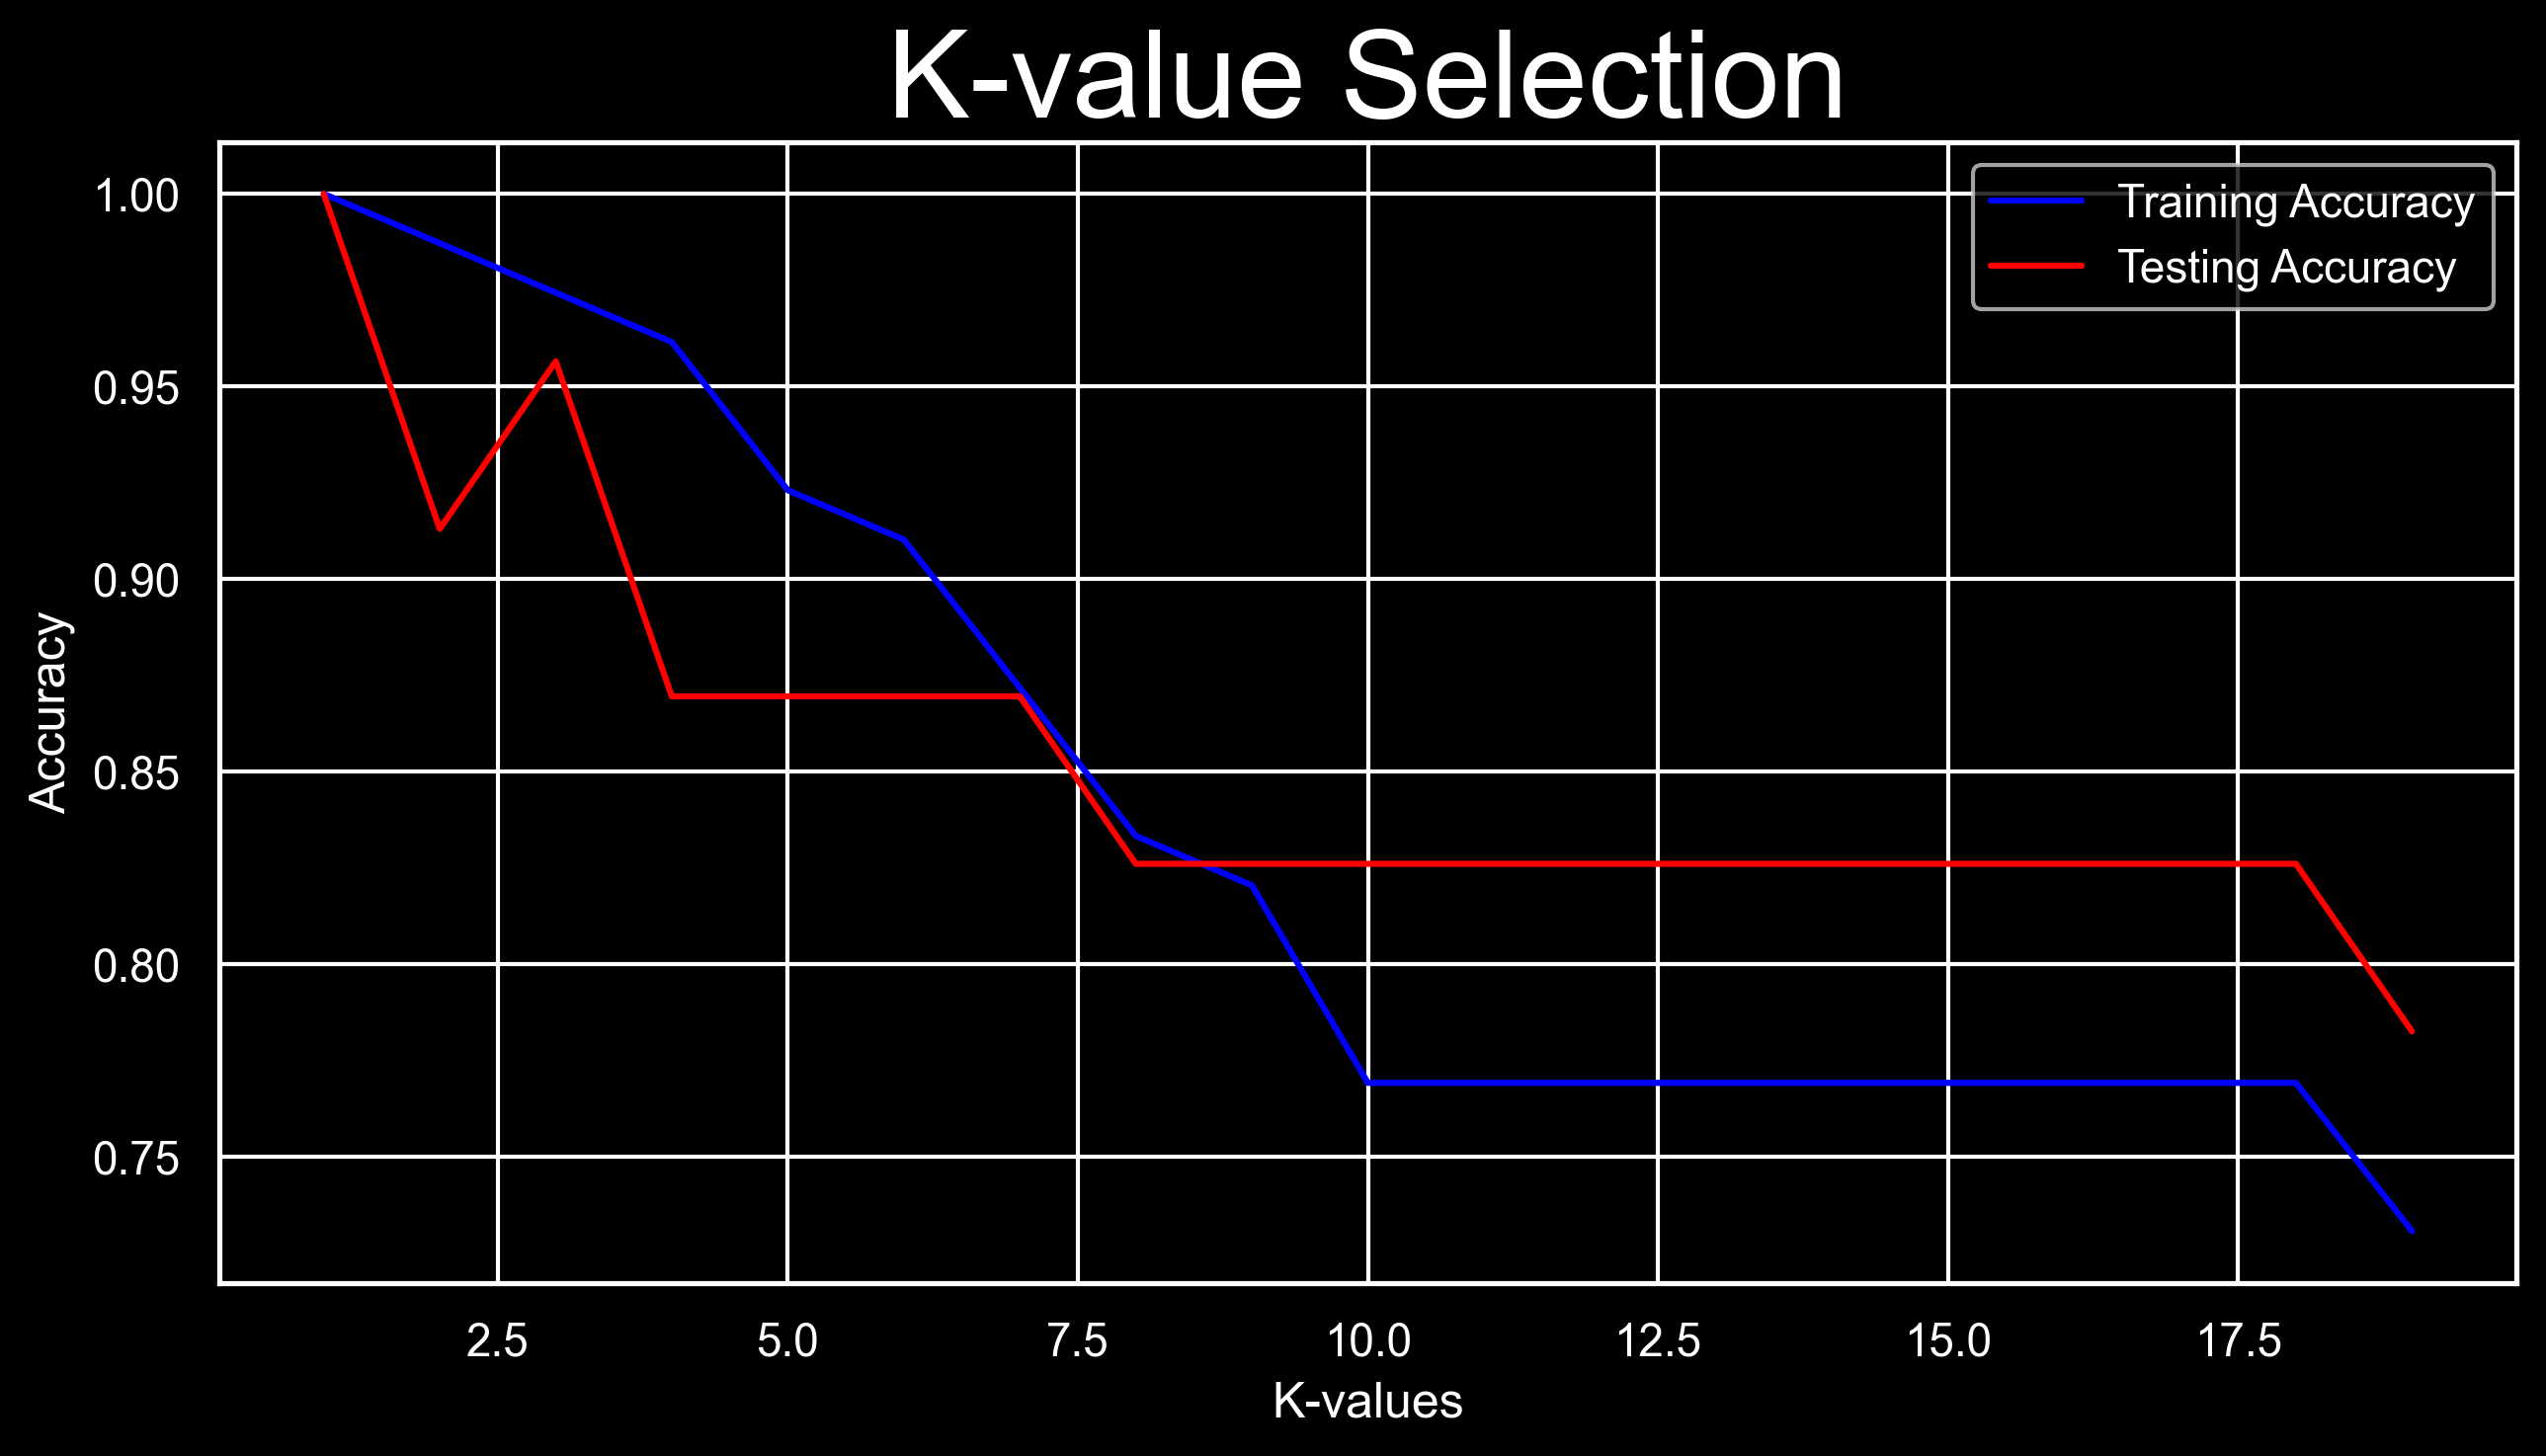

In [ ]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print(classification_report(y_test, ypred))
print("train_acc" , knn.score(X_train,y_train))
print("test_acc" ,knn.score(X_test,y_test))


NameError: name 'KNeighborsClassifier' is not defined